In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter, FuncFormatter
from wordcloud import WordCloud, STOPWORDS

In [2]:
df_top50 = pd.read_csv('D:\PyCharmProject\Top_Youtube_News_Media\_Top50_viewed_video_from_each_channels.csv')
df_stats =pd.read_csv('D:\PyCharmProject\Top_Youtube_News_Media\Mainstream_Media_Statistics.csv')

In [3]:
df_stats.head()

Unnamed: 0           channelName                        id  subscribers  \
0           0              Fox News  UCXIJgqnII2ZOINSWNOGFThA     10500000   
1           1    Al Jazeera English  UCNye-wNBqNL5ZzHSJj3l8Bg     10500000   
2           2                   Vox  UCLXo7UDZvByw2ixzpQCufnA     11400000   
3           3  Good Morning Britain  UCq18eeL7D9Vd8DhjMcLh9QQ      1200000   
4           4               E! News  UCjDsbbzHgTrGc4Ff26TJtsA      1220000   

   total views  total videos          created date  \
0  14839464315         93767  2006-09-19T01:48:52Z   
1   3343817389        105487  2006-11-23T14:12:43Z   
2   3260217205          1593  2014-03-04T20:30:22Z   
3   1048952422         11212  2014-08-18T09:23:49Z   
4    515416062         12501  2005-10-25T11:21:48Z   

                                         description                playlistId  
0  FOX News Channel (FNC) is a 24-hour all-encomp...  UUXIJgqnII2ZOINSWNOGFThA  
1  #AlJazeeraEnglish, we focus on people and even...  UUNye-wNBqNL5ZzHSJj3l8Bg  
2  Vox helps you understand our world.\n\nVox vid...  UULXo7UDZvByw2ixzpQCufnA  
3  The Good Morning Britain YouTube channel deliv...  UUq18eeL7D9Vd8DhjMcLh9QQ  
4  E! News is your go-to source for breaking cele...  UUjDsbbzHgTrGc4Ff26TJtsA

In [4]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    43 non-null     int64 
 1   channelName   43 non-null     object
 2   id            43 non-null     object
 3   subscribers   43 non-null     int64 
 4   total views   43 non-null     int64 
 5   total videos  43 non-null     int64 
 6   created date  43 non-null     object
 7   description   41 non-null     object
 8   playlistId    43 non-null     object
dtypes: int64(4), object(5)
memory usage: 3.1+ KB


In [5]:
df_stats['channelName'].unique()

array(['Fox News', 'Al Jazeera English', 'Vox', 'Good Morning Britain',
       'E! News', 'ABC News In-depth', 'BBC News', 'ABC News',
       'CBC News: The National', 'CNN', 'ITV News', 'On Demand News',
       'AFP News Agency', 'CBS Evening News', 'SABC News',
       'Forbes Breaking News', 'The Guardian', 'Washington Post',
       'euronews', 'CNBC Television', 'NowThis News', 'Daily Mail',
       'Voice of America', 'Channel 4 News', 'The Economist', 'CBC News',
       'Sky News Australia', 'Global News', 'PBS NewsHour', 'USA TODAY',
       'The Telegraph', 'The Sun', 'The New York Times', 'PINAS INSIDER',
       'Wall Street Journal', 'DW News', 'CBS News', 'The Young Turks',
       'MSNBC', 'Complex', 'Sky News', 'WION', 'NBC News'], dtype=object)

In [6]:
df_stats['channelName'].duplicated().any()

False

In [7]:
df_stats.isna().sum()

Unnamed: 0      0
channelName     0
id              0
subscribers     0
total views     0
total videos    0
created date    0
description     2
playlistId      0
dtype: int64

In [9]:
df_stats=df_stats.fillna('N/A')

In [10]:
#colors for bar graphs and functions for y axis labels
cmap = plt.cm.tab10
colors = cmap(np.arange(10) % cmap.N)

def millions(x, pos):
    return '%1.0fM' % (x * 1e-6)

formatterm = FuncFormatter(millions)

def billions(x, pos):
    return '%1.0fB' % (x * 1e-9)

formatterb = FuncFormatter(billions)

In [11]:
#Get df based on first feature arg
def get_relation_mul(df,top_n,*col):
    df_feature=df.filter([*col])
    feature=[*col][0]
    df_feature= df_feature.sort_values(feature, ascending=False)
    df_feature=df_feature.nlargest(top_n,feature)
    return df_feature

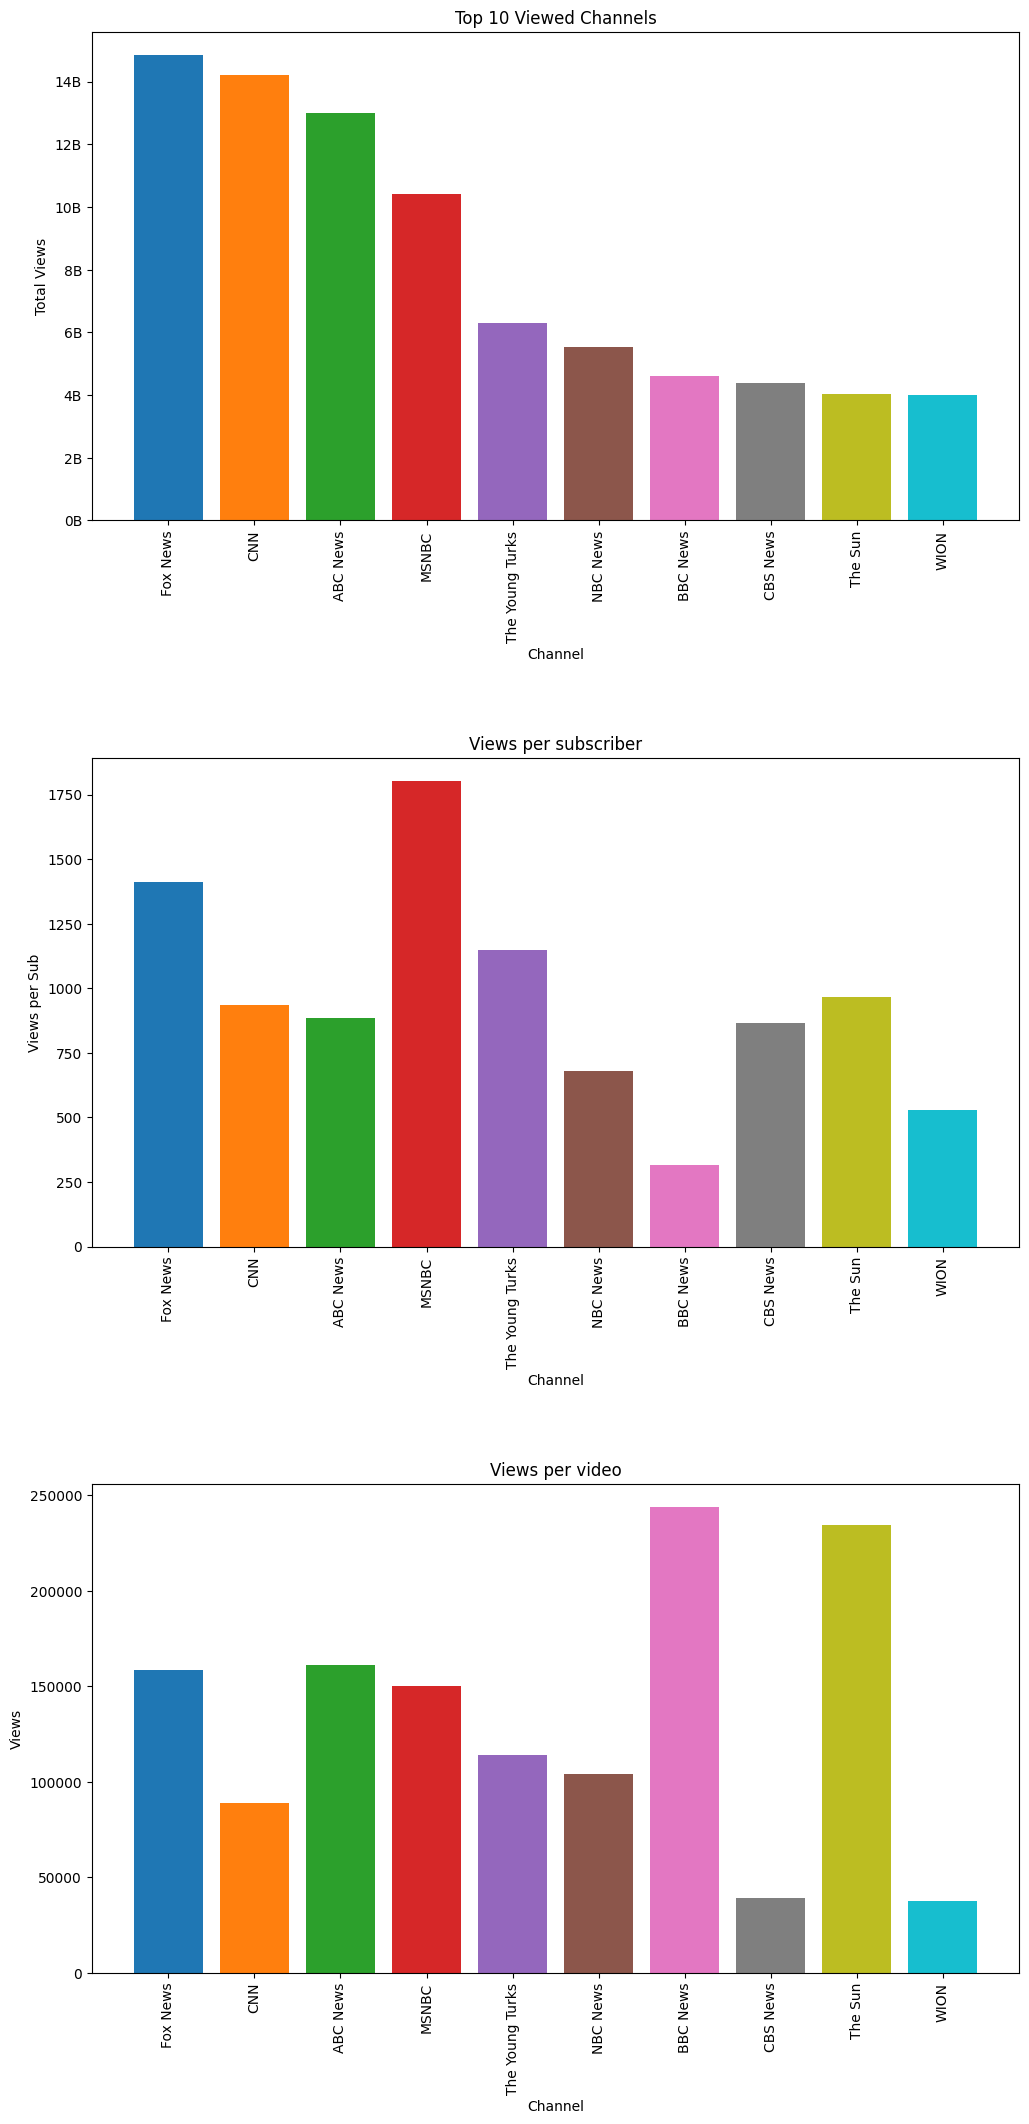

In [12]:
df_stats_views=get_relation_mul(df_stats,10,'total views','channelName','subscribers','total videos')
df_stats_views['views/sub']=df_stats_views['total views']/df_stats_views['subscribers']
df_stats_views['views/video']=df_stats_views['total views']/df_stats_views['total videos']

fig,(ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10,20))

fig.tight_layout(h_pad=15.0)

ax1.bar(df_stats_views['channelName'],df_stats_views['total views'], color=colors)
ax2.bar(df_stats_views['channelName'],df_stats_views['views/sub'], color=colors)
ax3.bar(df_stats_views['channelName'],df_stats_views['views/video'], color=colors)

ax1.set_xlabel('Channel')
ax1.set_ylabel('Total Views')
ax1.set_title('Top 10 Viewed Channels')
ax1.yaxis.set_major_formatter(formatterb)

ax2.set_xlabel('Channel')
ax2.set_ylabel('Views per Sub')
ax2.set_title('Views per subscriber')

ax3.set_xlabel('Channel')
ax3.set_ylabel('Views')
ax3.set_title('Views per video')
ax1.tick_params(axis='x', labelrotation = 90)
ax2.tick_params(axis='x', labelrotation = 90)
ax3.tick_params(axis='x', labelrotation = 90)

In [13]:
df_stats_videos=get_relation_mul(df_stats,10,'total videos','channelName','subscribers','total views')

In [14]:
df_stats_videos['videos/sub']=df_stats_videos['total videos']/df_stats_videos['subscribers']
df_stats_videos['views/video']=df_stats_videos['total views']/df_stats_videos['total videos']

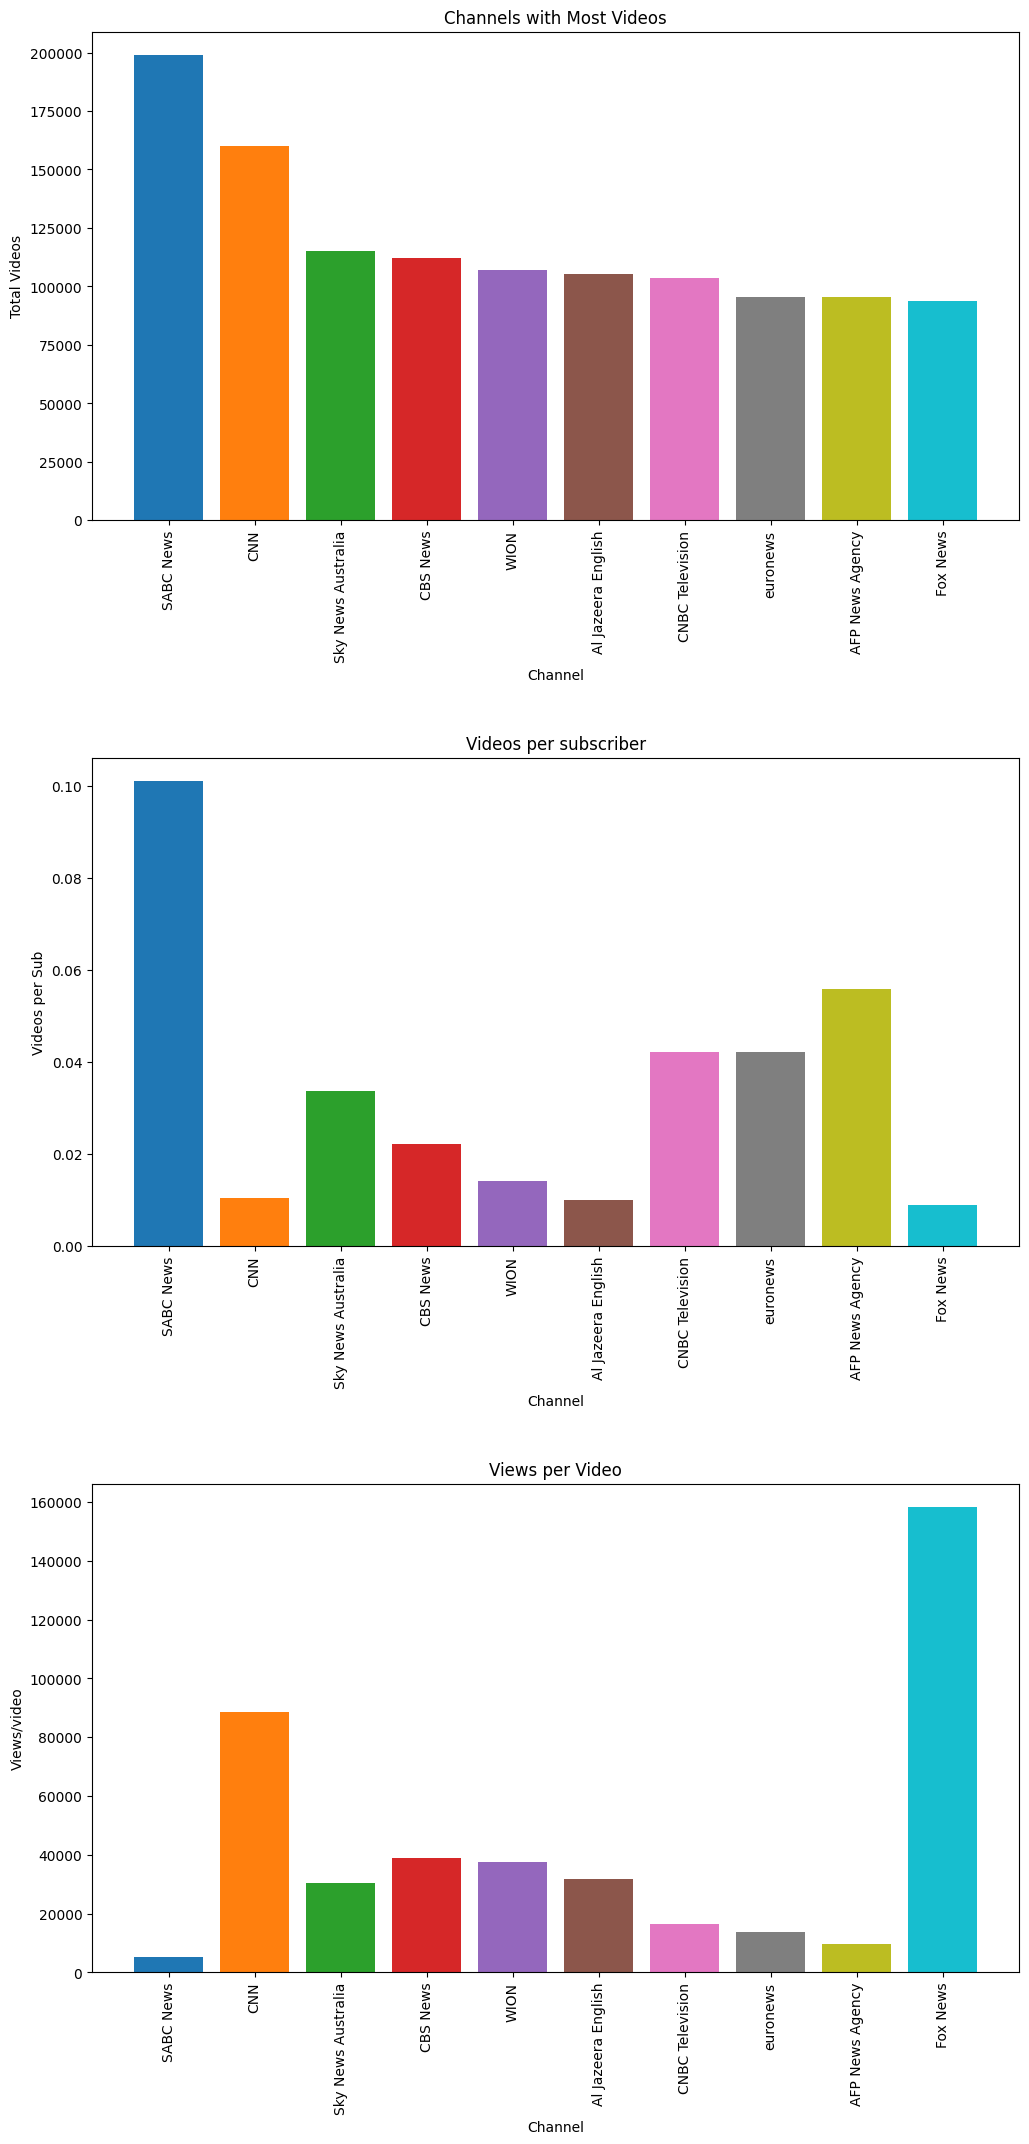

In [15]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10,20))
fig.tight_layout(h_pad=15.0)

ax1.bar(df_stats_videos['channelName'],df_stats_videos['total videos'], color=colors)
ax2.bar(df_stats_videos['channelName'],df_stats_videos['videos/sub'], color=colors)
ax3.bar(df_stats_videos['channelName'],df_stats_videos['views/video'], color=colors)
ax1.set_xlabel('Channel')
ax1.set_ylabel('Total Videos')
ax1.set_title('Channels with Most Videos')
ax2.set_xlabel('Channel')
ax2.set_ylabel('Videos per Sub')
ax2.set_title('Videos per subscriber')
ax3.set_xlabel('Channel')
ax3.set_ylabel('Views/video')
ax3.set_title('Views per Video')
ax1.tick_params(axis='x', labelrotation = 90)
ax2.tick_params(axis='x', labelrotation = 90)
ax3.tick_params(axis='x', labelrotation = 90)

In [16]:
df_stats_subs=get_relation_mul(df_stats,10,'subscribers','total views','total videos','channelName')

In [17]:
df_stats_subs['views/sub']=df_stats_subs['total views']/df_stats_subs['subscribers']
df_stats_subs['sub/video']=df_stats_subs['subscribers']/df_stats_subs['total videos']

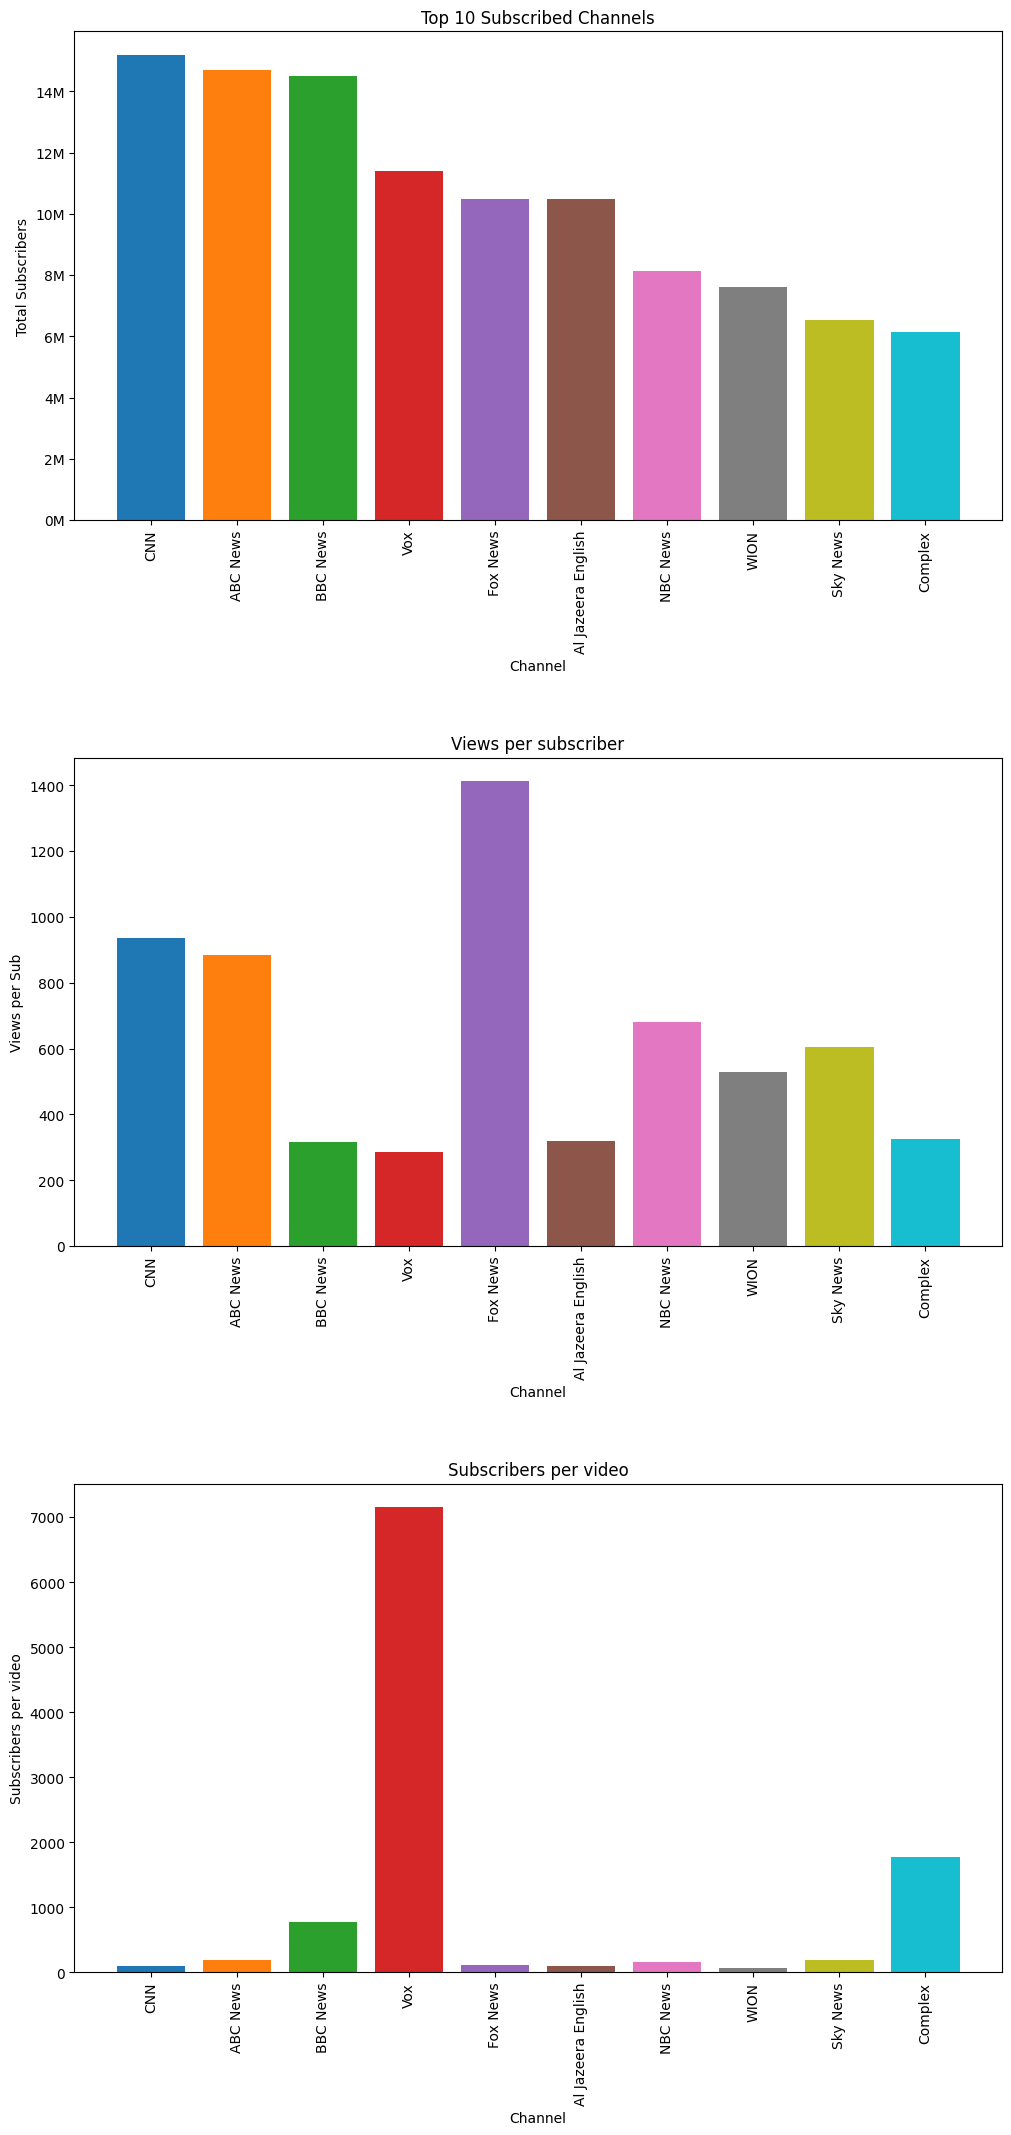

In [18]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10,20))
#fig.suptitle('Top 10 Channels with most videos')
fig.tight_layout(h_pad=15.0)

ax1.bar(df_stats_subs['channelName'],df_stats_subs['subscribers'], color=colors)
ax2.bar(df_stats_subs['channelName'],df_stats_subs['views/sub'], color=colors)
ax3.bar(df_stats_subs['channelName'],df_stats_subs['sub/video'], color=colors)
ax1.set_xlabel('Channel')
ax1.set_ylabel('Total Subscribers')
ax1.set_title('Top 10 Subscribed Channels')
ax1.yaxis.set_major_formatter(formatterm)
ax2.set_xlabel('Channel')
ax2.set_ylabel('Views per Sub')
ax2.set_title('Views per subscriber')
ax3.set_xlabel('Channel')
ax3.set_ylabel('Subscribers per video')
ax3.set_title('Subscribers per video')
ax1.tick_params(axis='x', labelrotation = 90)
ax2.tick_params(axis='x', labelrotation = 90)
ax3.tick_params(axis='x', labelrotation = 90)

In [19]:
stopwords=set(STOPWORDS)

In [20]:
def generate_wordcloud(words, title, max_words=25, figsize=10):
    wordCloud=WordCloud(background_color='white',
                    scale=5, 
                    min_font_size=5,
                    max_words=max_words,
                    stopwords=stopwords).generate(words)
    plt.figure(figsize=(figsize,figsize))
    plt.axis("off") 
    plt.title(title, pad=20, fontsize=20)
    
    plt.imshow(wordCloud) 
    plt.show()

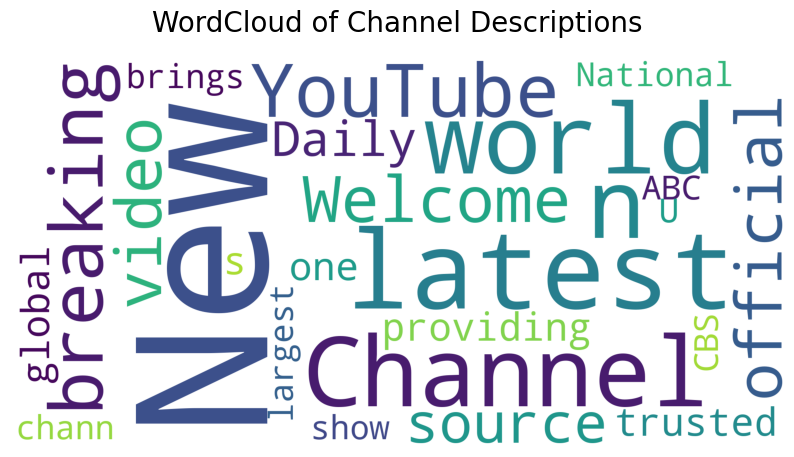

In [21]:
generate_wordcloud(str(df_stats['description']),"WordCloud of Channel Descriptions")

In [22]:
df_top50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2200 non-null   int64  
 1   Video Id      2200 non-null   object 
 2   channelTitle  2200 non-null   object 
 3   title         2200 non-null   object 
 4   publishedAt   2200 non-null   object 
 5   categoryId    2200 non-null   int64  
 6   description   2198 non-null   object 
 7   viewCount     2196 non-null   float64
 8   likeCount     2186 non-null   float64
 9   commentCount  1964 non-null   float64
 10  duration      2200 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 189.2+ KB


In [23]:
df_top50.head()

Unnamed: 0     Video Id    channelTitle  \
0        1400  spPo80dPUwI       USA TODAY   
1        1900  NxRGRFKBVLg  On Demand News   
2        1401  KDo8n_7_2YI       USA TODAY   
3        1402  _Gtm2j2gb6w       USA TODAY   
4         650  or_MDJnmihc        CBS News   

                                               title           publishedAt  \
0  Heroic mom saves terrified five-year-old from ...  2022-12-05T17:28:31Z   
1             Fans Catch CAT Plummeting from Stadium  2021-09-13T15:02:56Z   
2  Brave woman fights off male attacker while alo...  2023-02-17T13:28:54Z   
3  Hurricane Fiona devastates Puerto Rico, intens...  2022-09-22T17:29:38Z   
4  Defendant collapses in court after guilty verdict  2017-11-14T17:36:13Z   

   categoryId                                        description    viewCount  \
0          25  A mother came to her five-year-old daughter's ...  347180823.0   
1          25  'Fans Catch CAT Plummeting from Stadium'\n\nFa...  121244026.0   
2          25  A 24-year-old woman successfully fought off a ...  112886052.0   
3          25  Hurricane Fiona flooded Puerto Rico with 6 to ...   97966113.0   
4          25  Diana Lovejoy collapsed in a California courtr...   75970739.0   

    likeCount  commentCount duration  
0  10370485.0      269937.0    PT41S  
1   6269691.0       95053.0    PT44S  
2   4248640.0       92533.0    PT37S  
3   1504843.0        7100.0    PT42S  
4    371733.0       79515.0  PT2M31S

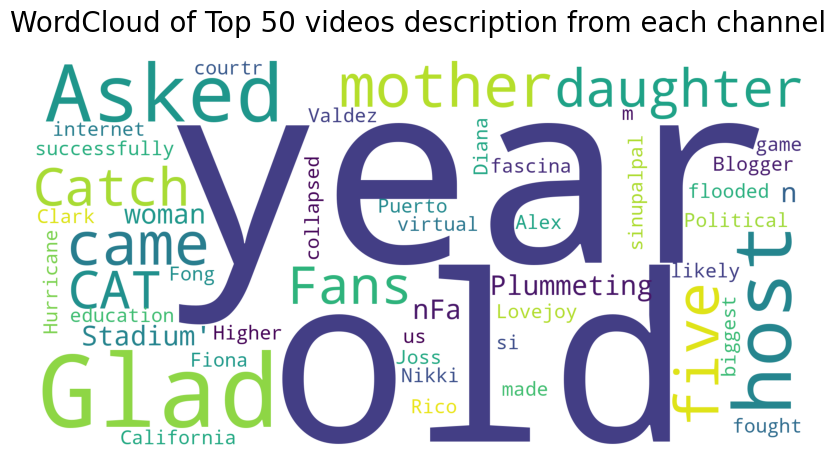

In [24]:
generate_wordcloud(str(df_top50['description']),"WordCloud of Top 50 videos description from each channel", max_words=50)

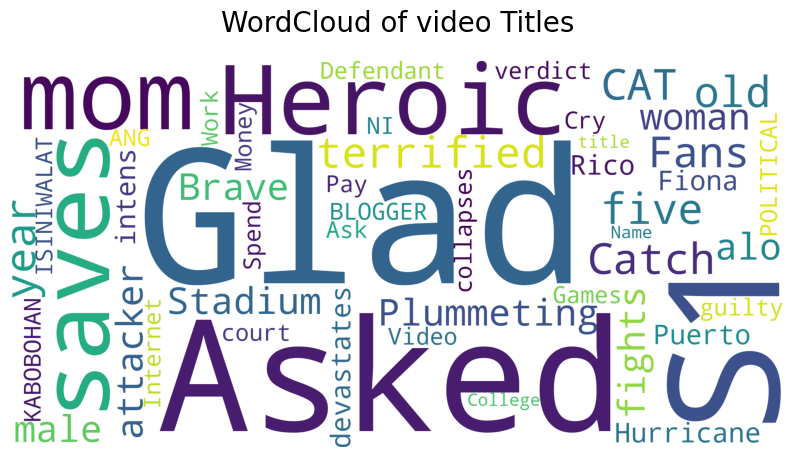

In [25]:
generate_wordcloud(str(df_top50['title']),"WordCloud of video Titles", max_words=50)

In [27]:
list_sub=df_stats_subs['channelName'].values.tolist()

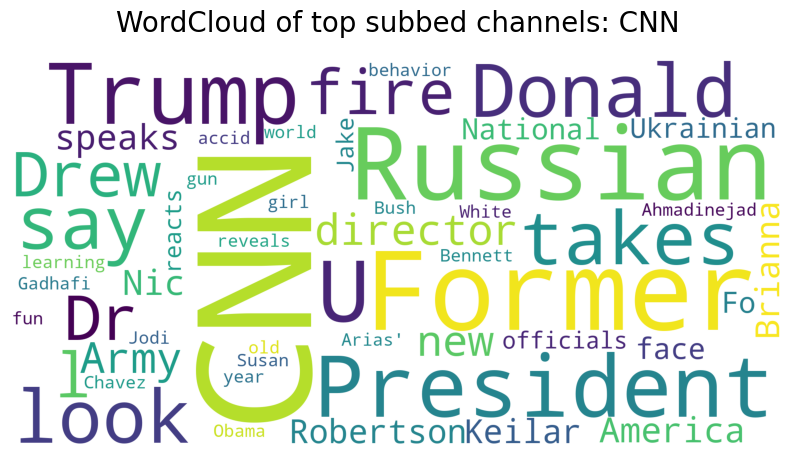

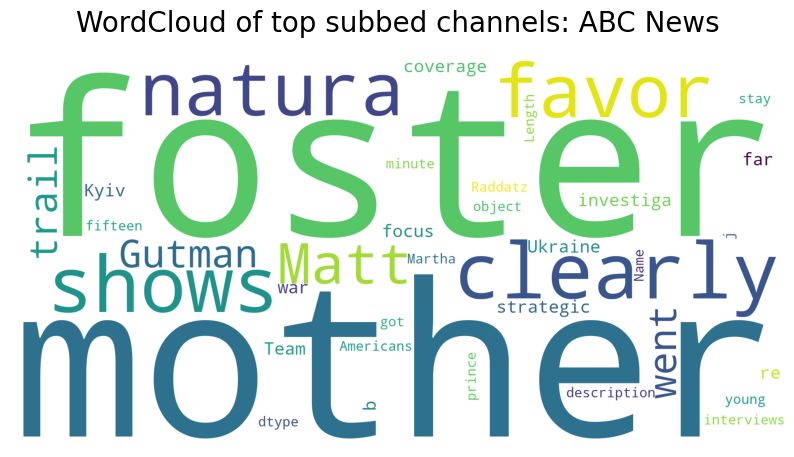

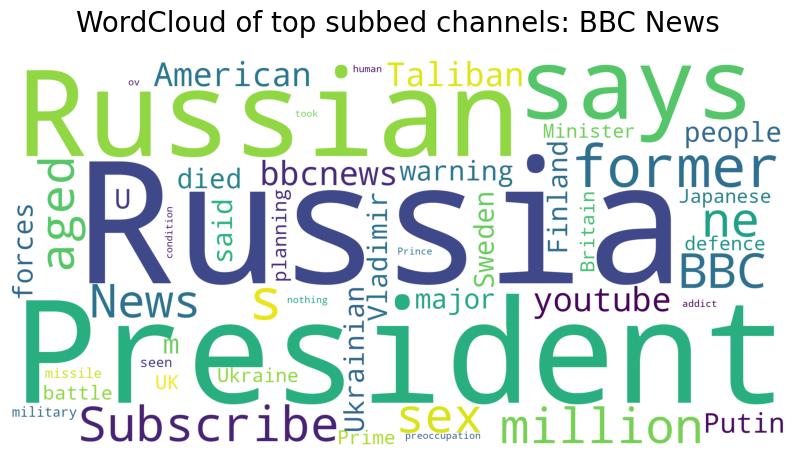

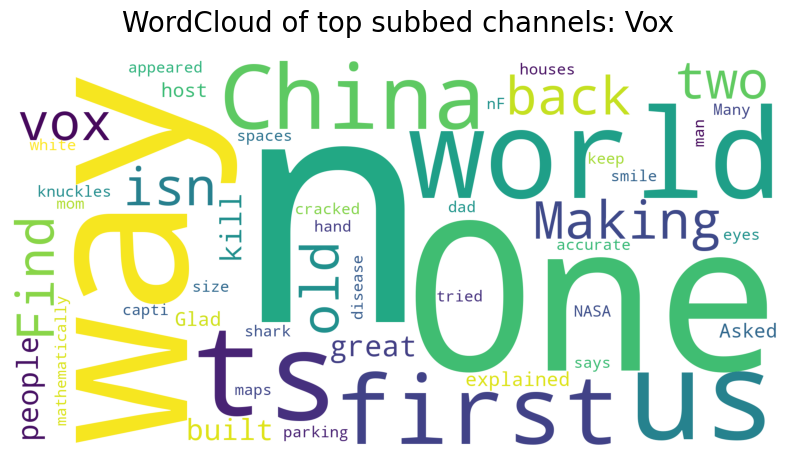

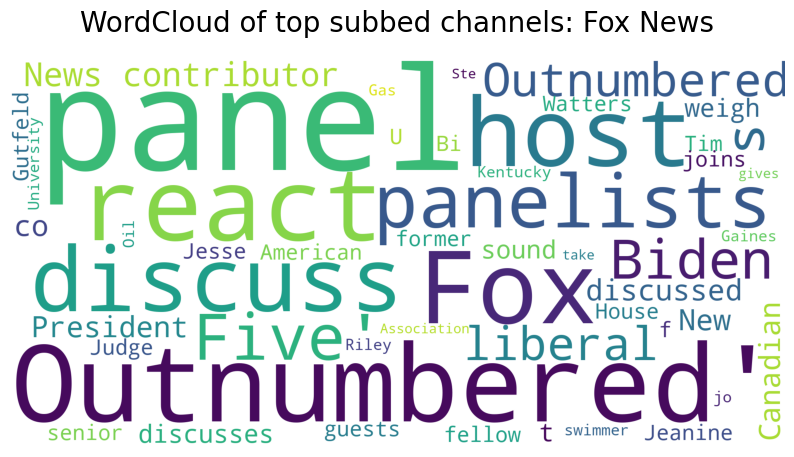

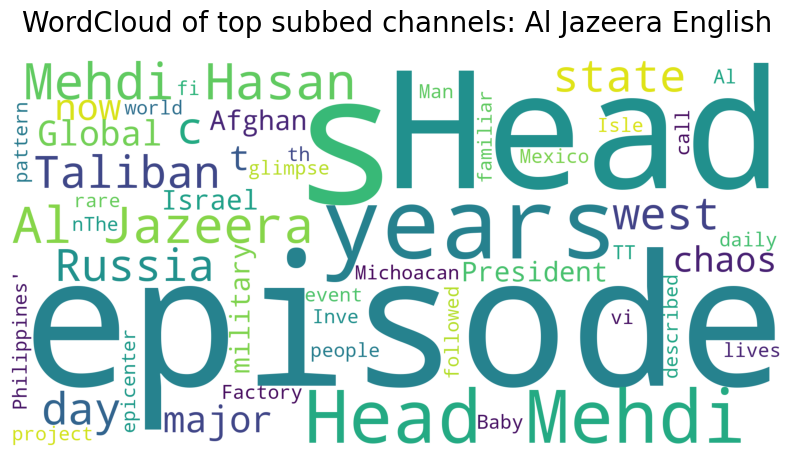

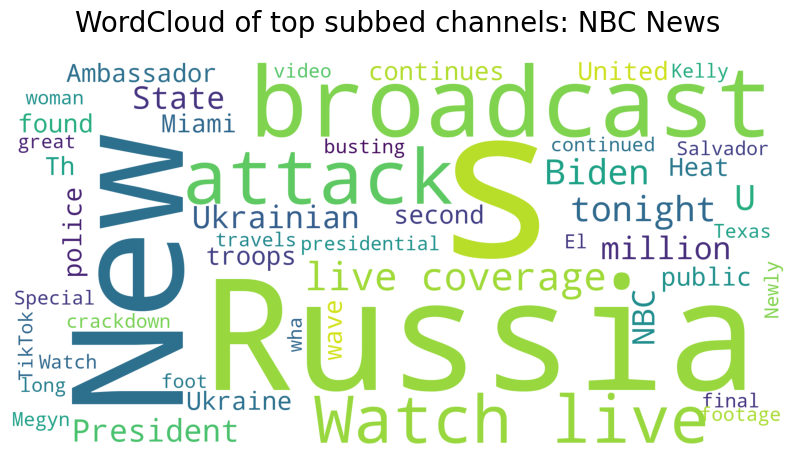

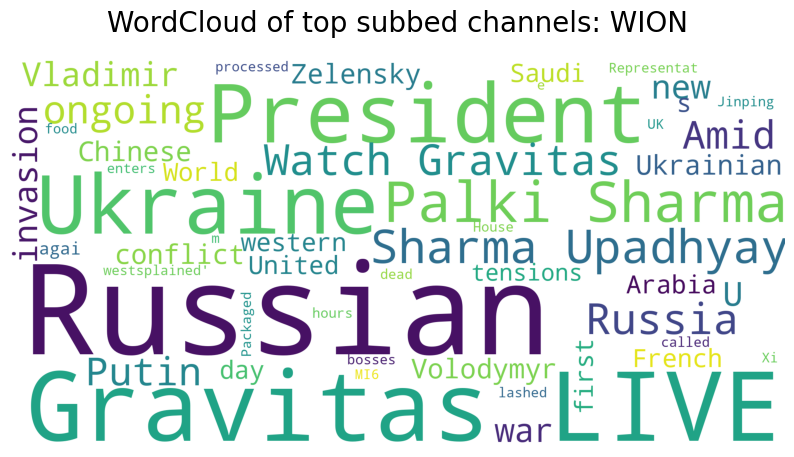

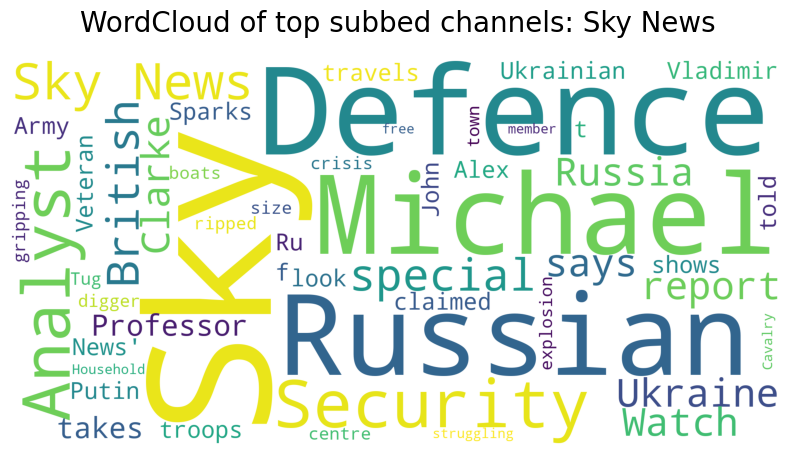

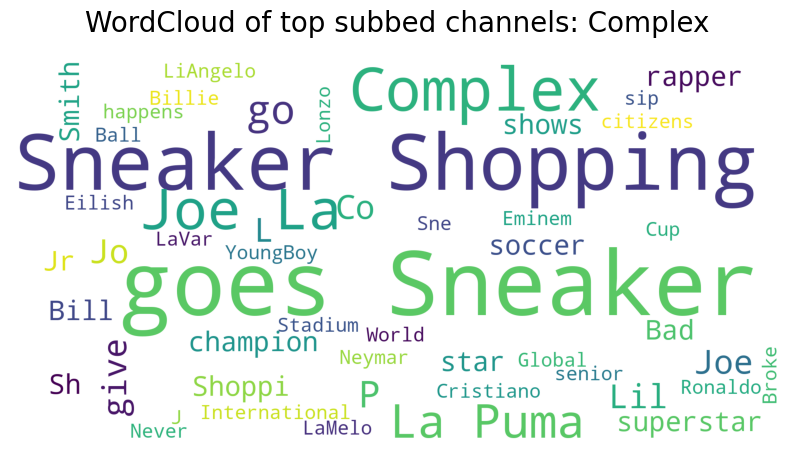

In [28]:
#WordCloud for top 10 subscribed channels videos
for ch in list_sub:
    df_top50_ch=df_top50.loc[df_top50['channelTitle']==ch]
    generate_wordcloud(str(df_top50_ch['description']),f"WordCloud of top subbed channels: {ch}", max_words=50)
                             

In [29]:
list_videos=df_stats_videos['channelName'].values.tolist()

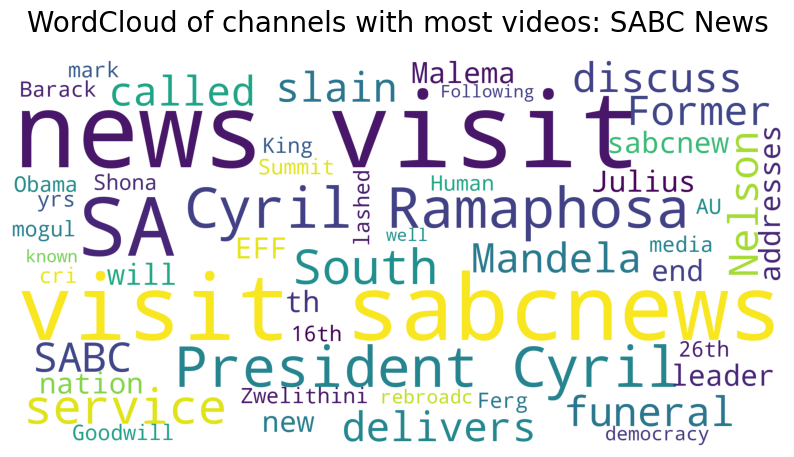

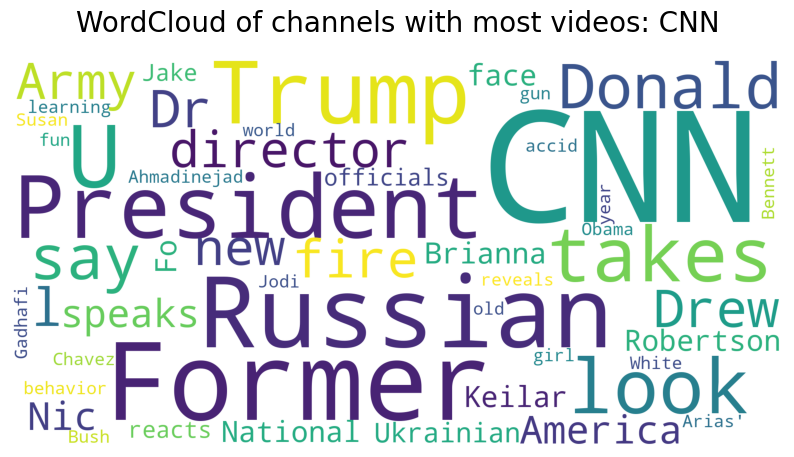

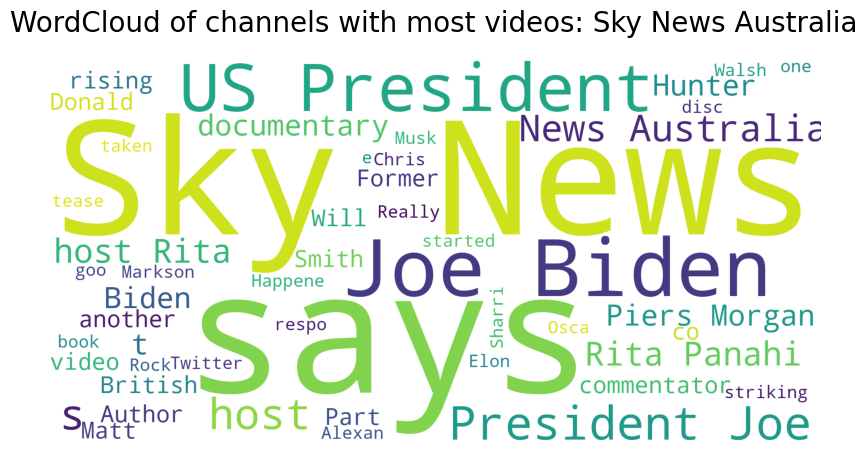

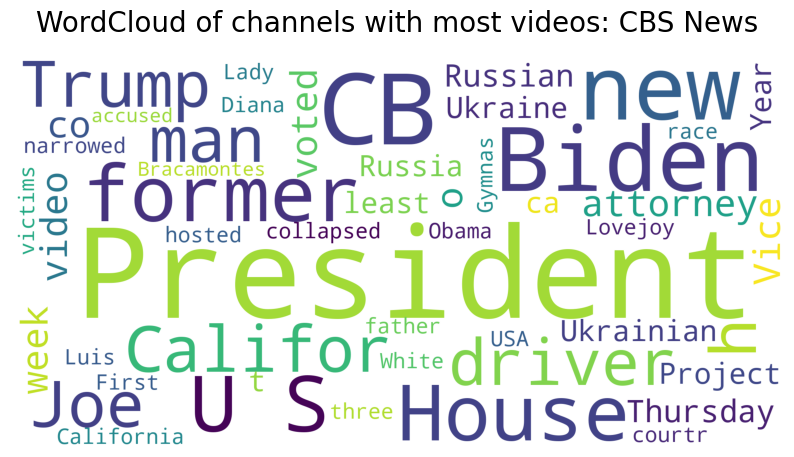

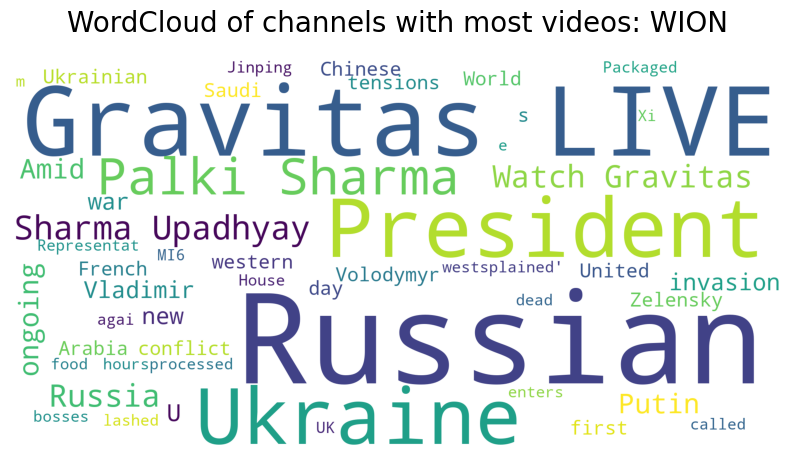

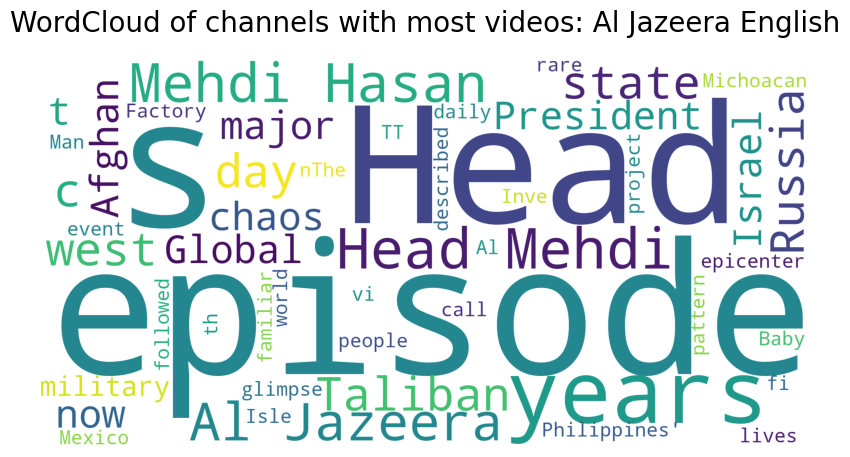

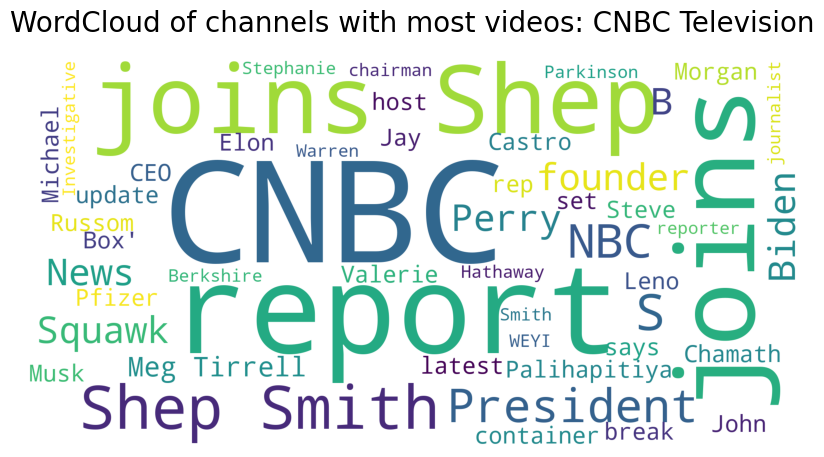

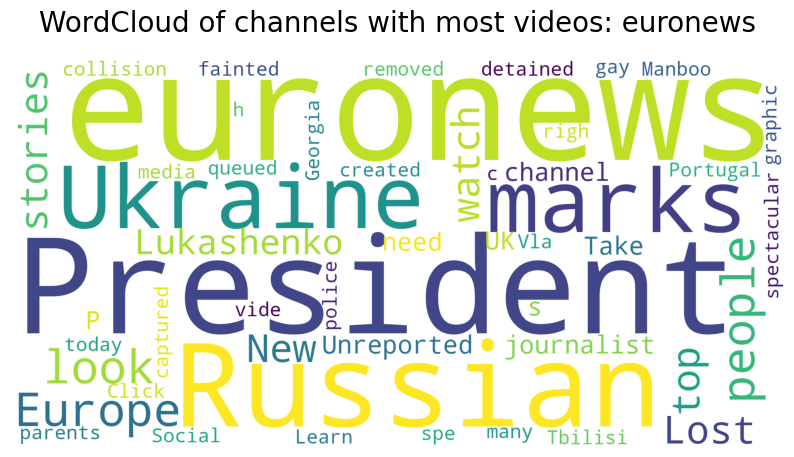

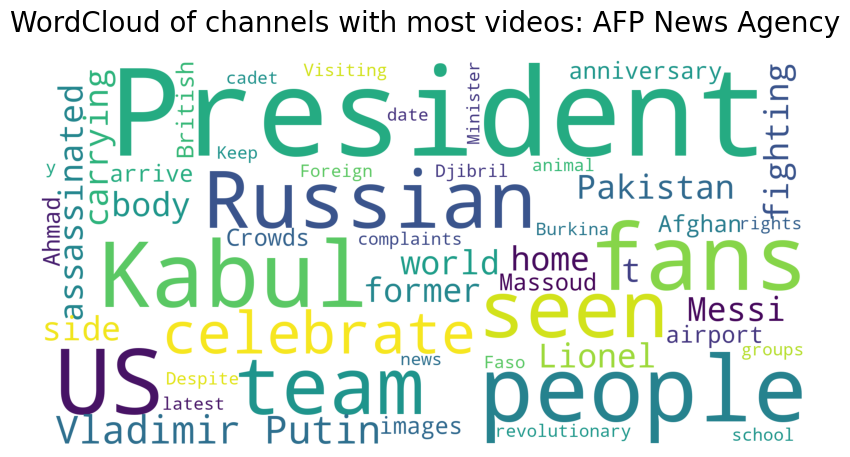

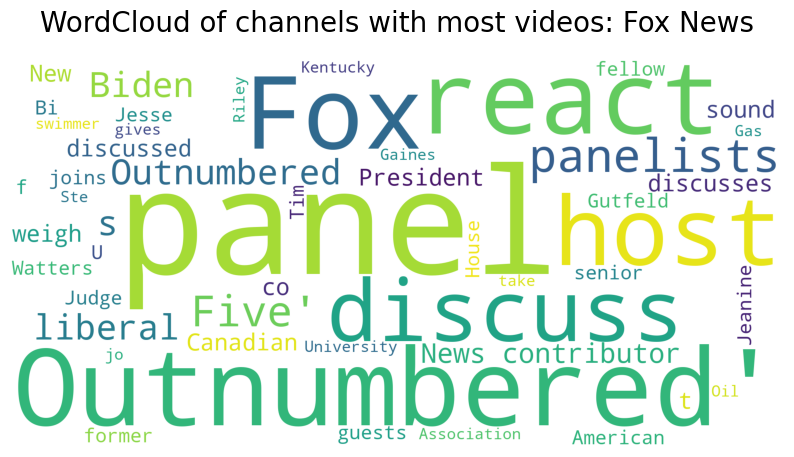

In [30]:
#Wordcloud of top 10 channels with most videos
for ch in list_videos:
    df_top50_ch=df_top50.loc[df_top50['channelTitle']==ch]
    generate_wordcloud(str(df_top50_ch['description']),f"WordCloud of channels with most videos: {ch}", max_words=50)
                             

In [213]:
list_views=df_stats_views['channelName'].values.tolist()

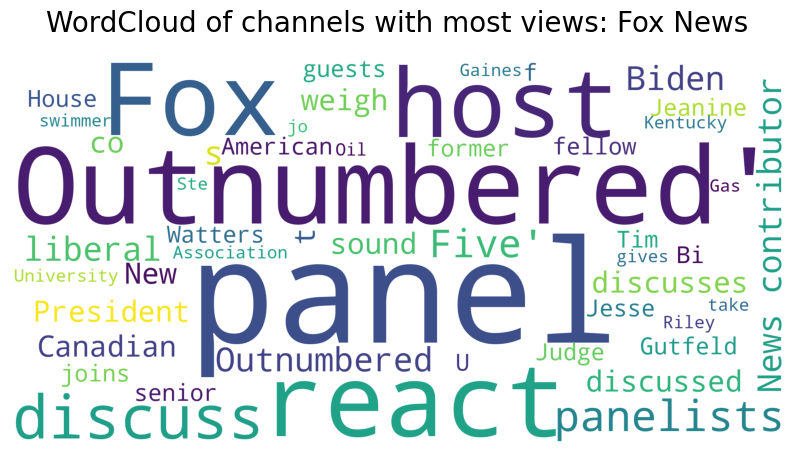

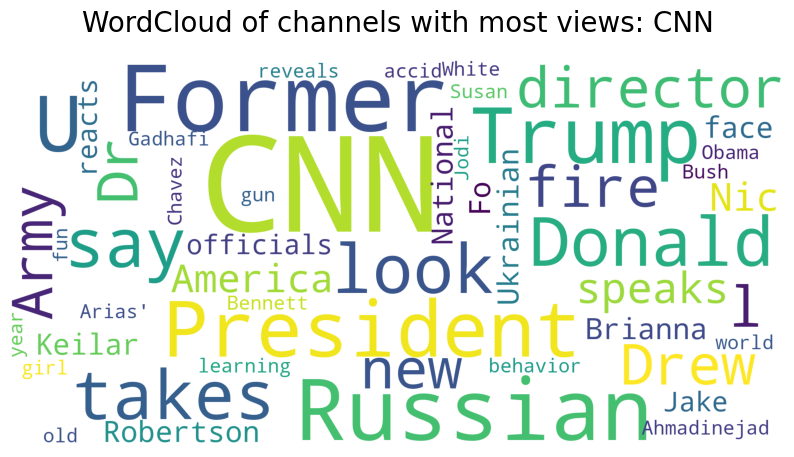

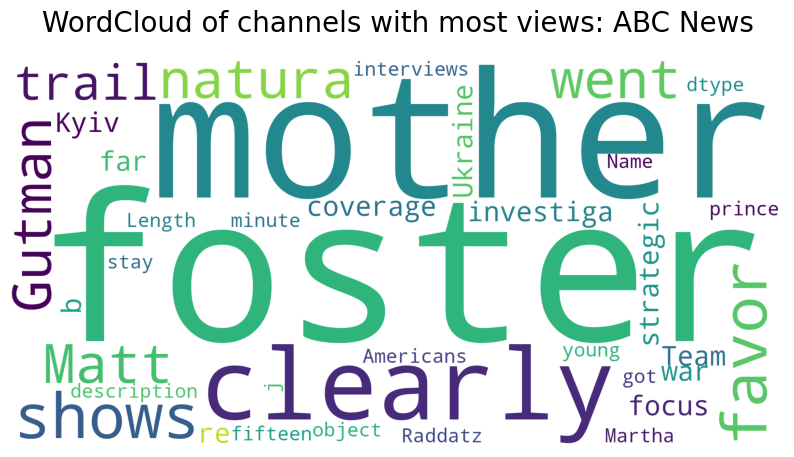

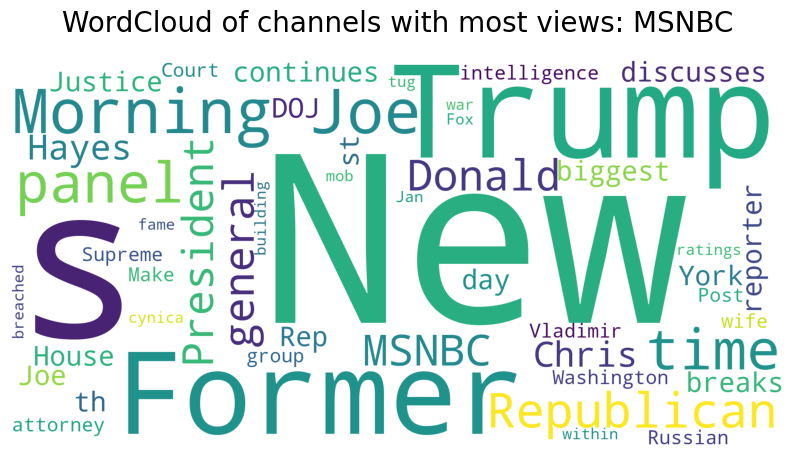

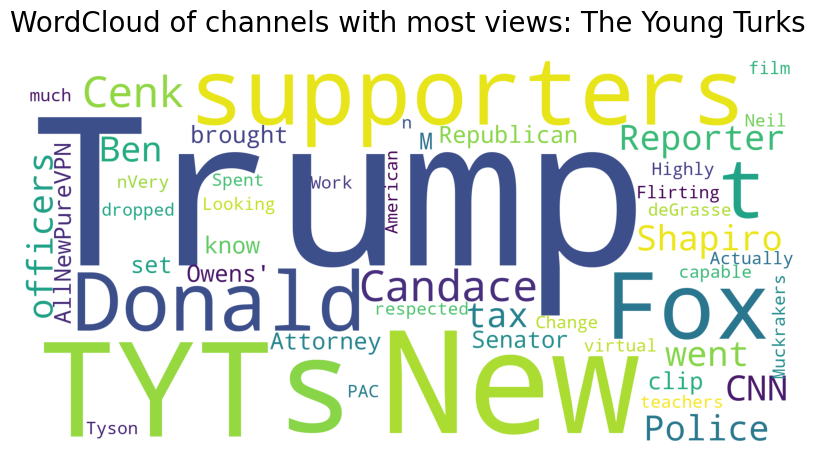

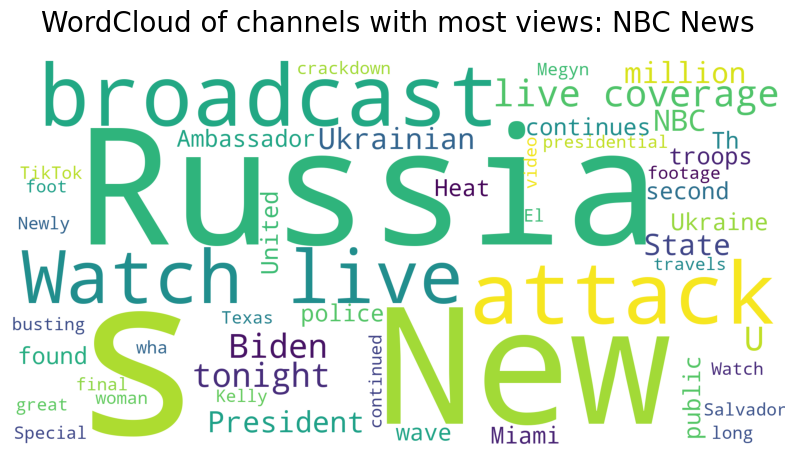

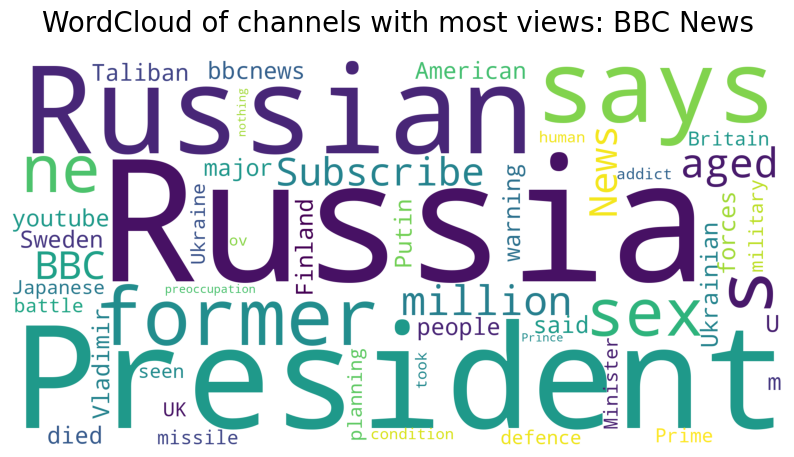

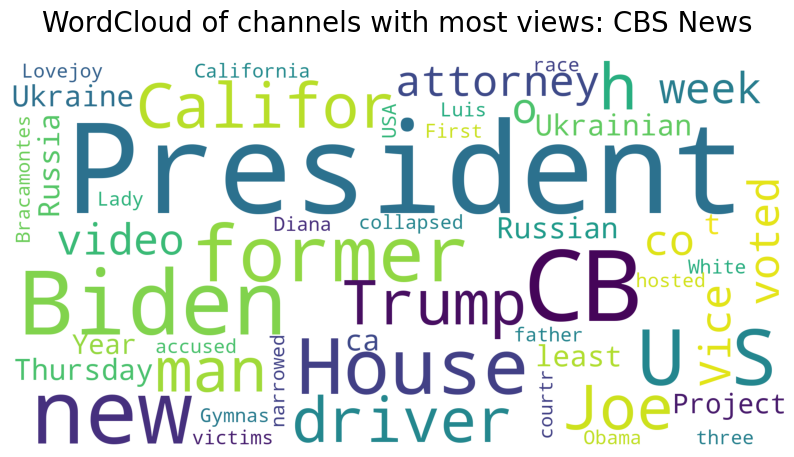

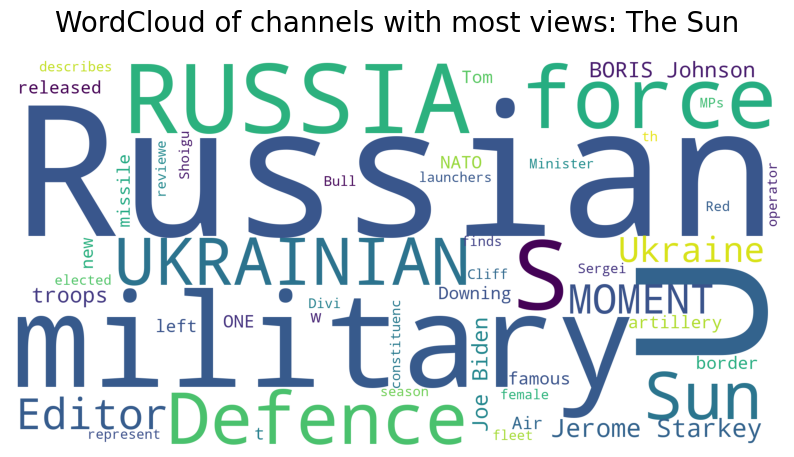

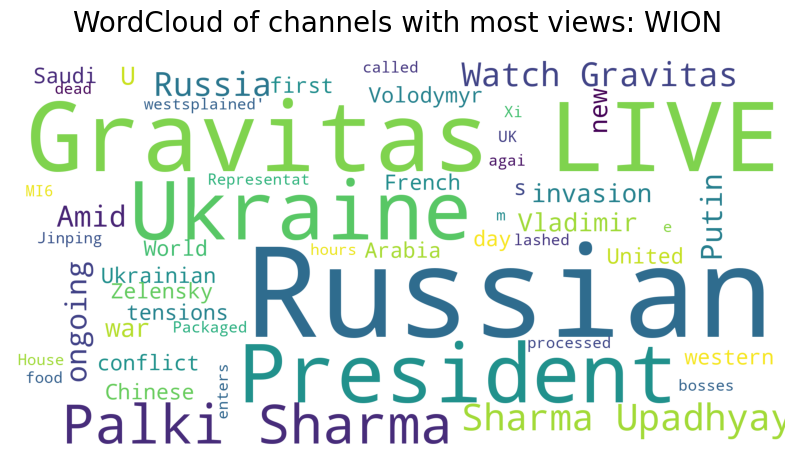

In [214]:
for ch in list_views:
    df_top50_ch=df_top50.loc[df_top50['channelTitle']==ch]
    generate_wordcloud(str(df_top50_ch['description']),f"WordCloud of channels with most views: {ch}", max_words=50)
                             

In [31]:
df_top50_ch_list=df_top50['channelTitle'].unique().tolist()

In [32]:
#Get top N videos of each channel based on feature
def get_top_channel_feature(feature1, feature2, top_n):
    description_list=[]
    for ch in df_top50_ch_list:
        df_top50_ch=df_top50.loc[df_top50['channelTitle']==ch]
        df_top50_ch=df_top50_ch.sort_values(feature1, ascending=False)
        for n in range(top_n):
            description=df_top50_ch.iloc[n-1][feature2]
            description_list.append(description)
    return description_list
    

In [33]:
description_list_view=get_top_channel_feature('viewCount','description',2)

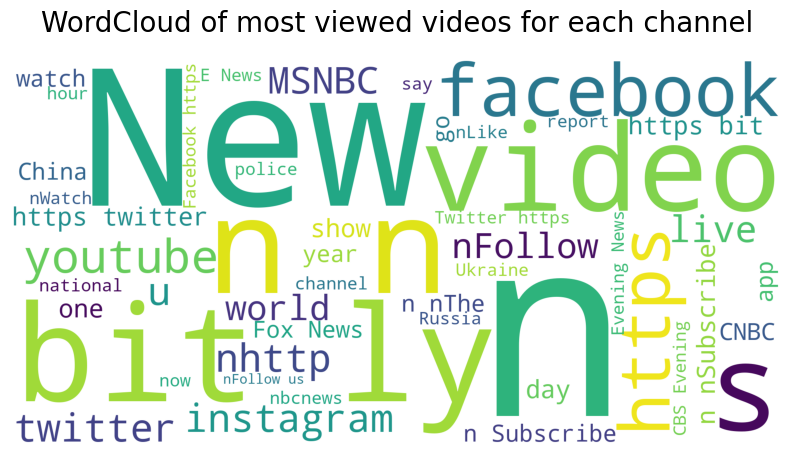

In [34]:
generate_wordcloud(str(description_list_view),"WordCloud of most viewed videos for each channel", max_words=50)

In [35]:
description_list_like=get_top_channel_feature('likeCount','description',2)

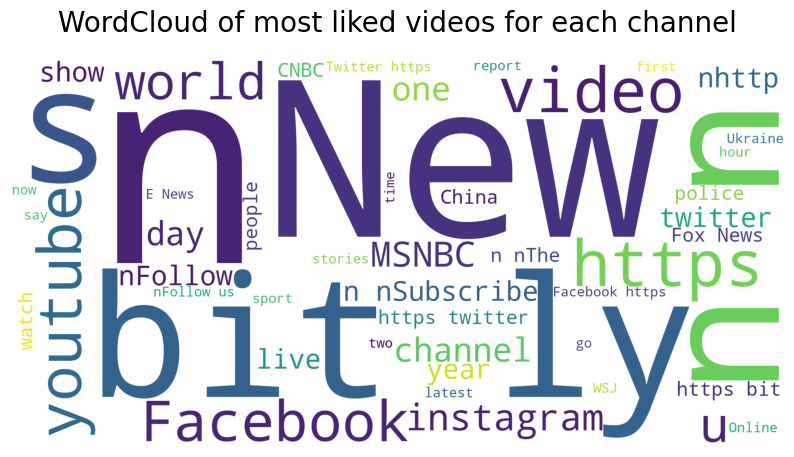

In [36]:
generate_wordcloud(str(description_list_like),"WordCloud of most liked videos for each channel", max_words=50)